In [1]:
# importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Loading Data Set
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train),len(x_test))

60000 10000


### Data Visualisation

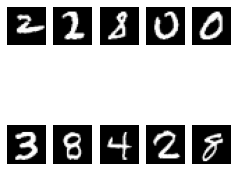

In [3]:
# Visualising 10 random sample from training data
indexes = np.random.randint(0, x_train.shape[0], size=10)
images = x_train[indexes]

# plot the 10 mnist digits
plt.figure(figsize=(4, 4))
for i in range(len(indexes)):
    plt.subplot(2, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.close('all')

### Resize and Normalizing Data



In [4]:
image_size = x_train.shape[1]
input_size = image_size **2
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255


# Importing Libraries

In [5]:
#Importing Keras layers 
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers

In [6]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [7]:
# Convert labels to One Hot Encoded
num_digits = 10
y_train = keras.utils.to_categorical(y_train, num_digits)
y_test = keras.utils.to_categorical(y_test, num_digits)


#1) Varying the number of hidden layers from 0 to 2

## 2 Hidden Layer

In [8]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 100
n_hidden_2 = 100
n_hidden_3 = 100
num_digits = 10

# Total Parameter = 99710

Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

model = Model(Inp, output)
print(model.summary()) 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 100)               78500     
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               10100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# Insert Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

# Using  Stochastic Gradient Descent as our optimizing methodology
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# Using 10 percent of training as validation data
history1 = model.fit(x_train, y_train,batch_size = batch_size,epochs = training_epochs,verbose = 2,validation_split=0.1)

loss_2, acc_2 = model.evaluate(x_test, y_test, batch_size=batch_size)


Epoch 1/20
540/540 - 2s - loss: 1.2561 - accuracy: 0.6706 - val_loss: 0.5389 - val_accuracy: 0.8770
Epoch 2/20
540/540 - 1s - loss: 0.4946 - accuracy: 0.8692 - val_loss: 0.3458 - val_accuracy: 0.9113
Epoch 3/20
540/540 - 1s - loss: 0.3837 - accuracy: 0.8937 - val_loss: 0.2916 - val_accuracy: 0.9205
Epoch 4/20
540/540 - 1s - loss: 0.3392 - accuracy: 0.9042 - val_loss: 0.2625 - val_accuracy: 0.9262
Epoch 5/20
540/540 - 1s - loss: 0.3116 - accuracy: 0.9111 - val_loss: 0.2446 - val_accuracy: 0.9297
Epoch 6/20
540/540 - 1s - loss: 0.2904 - accuracy: 0.9176 - val_loss: 0.2311 - val_accuracy: 0.9338
Epoch 7/20
540/540 - 1s - loss: 0.2737 - accuracy: 0.9218 - val_loss: 0.2171 - val_accuracy: 0.9400
Epoch 8/20
540/540 - 1s - loss: 0.2592 - accuracy: 0.9264 - val_loss: 0.2073 - val_accuracy: 0.9393
Epoch 9/20
540/540 - 1s - loss: 0.2468 - accuracy: 0.9295 - val_loss: 0.1996 - val_accuracy: 0.9437
Epoch 10/20
540/540 - 1s - loss: 0.2356 - accuracy: 0.9329 - val_loss: 0.1901 - val_accuracy: 0.9457

## 1 Hidden Layer

In [10]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 100
num_digits = 10

# Total Parameter = 79510

Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

model = Model(Inp, output)
print(model.summary()) 

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 100)               78500     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# Insert Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

# Using  Stochastic Gradient Descent as our optimizing methodology
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# Using 10 percent of training as validation data
history1 = model.fit(x_train, y_train,batch_size = batch_size,epochs = training_epochs,verbose = 2,validation_split=0.1)

loss_1, acc_1 = model.evaluate(x_test, y_test, batch_size=batch_size)

Epoch 1/20
540/540 - 1s - loss: 1.1633 - accuracy: 0.7163 - val_loss: 0.5610 - val_accuracy: 0.8862
Epoch 2/20
540/540 - 1s - loss: 0.5317 - accuracy: 0.8676 - val_loss: 0.3871 - val_accuracy: 0.9090
Epoch 3/20
540/540 - 1s - loss: 0.4285 - accuracy: 0.8859 - val_loss: 0.3301 - val_accuracy: 0.9158
Epoch 4/20
540/540 - 1s - loss: 0.3831 - accuracy: 0.8949 - val_loss: 0.3012 - val_accuracy: 0.9205
Epoch 5/20
540/540 - 1s - loss: 0.3559 - accuracy: 0.9006 - val_loss: 0.2827 - val_accuracy: 0.9247
Epoch 6/20
540/540 - 1s - loss: 0.3365 - accuracy: 0.9061 - val_loss: 0.2701 - val_accuracy: 0.9260
Epoch 7/20
540/540 - 1s - loss: 0.3215 - accuracy: 0.9098 - val_loss: 0.2583 - val_accuracy: 0.9275
Epoch 8/20
540/540 - 1s - loss: 0.3090 - accuracy: 0.9131 - val_loss: 0.2511 - val_accuracy: 0.9308
Epoch 9/20
540/540 - 1s - loss: 0.2984 - accuracy: 0.9164 - val_loss: 0.2417 - val_accuracy: 0.9335
Epoch 10/20
540/540 - 1s - loss: 0.2887 - accuracy: 0.9190 - val_loss: 0.2342 - val_accuracy: 0.9355

## 0 Hidden Layer

In [12]:
# Input Parameters
n_input = 784 # number of features
num_digits = 10

# Total parameter = 7850

Inp = Input(shape=(784,))
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(Inp)
model = Model(Inp, output)
print(model.summary()) 

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Insert Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

# Using  Stochastic Gradient Descent as our optimizing methodology
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# Using 10 percent of training as validation data
history1 = model.fit(x_train, y_train,batch_size = batch_size,epochs = training_epochs,verbose = 2,validation_split=0.1)

loss_0, acc_0 = model.evaluate(x_test, y_test, batch_size=batch_size)

Epoch 1/20
540/540 - 1s - loss: 1.2198 - accuracy: 0.7224 - val_loss: 0.7141 - val_accuracy: 0.8702
Epoch 2/20
540/540 - 1s - loss: 0.6819 - accuracy: 0.8458 - val_loss: 0.5265 - val_accuracy: 0.8927
Epoch 3/20
540/540 - 1s - loss: 0.5657 - accuracy: 0.8631 - val_loss: 0.4530 - val_accuracy: 0.8992
Epoch 4/20
540/540 - 1s - loss: 0.5098 - accuracy: 0.8718 - val_loss: 0.4126 - val_accuracy: 0.9047
Epoch 5/20
540/540 - 1s - loss: 0.4756 - accuracy: 0.8771 - val_loss: 0.3869 - val_accuracy: 0.9070
Epoch 6/20
540/540 - 1s - loss: 0.4521 - accuracy: 0.8807 - val_loss: 0.3687 - val_accuracy: 0.9088
Epoch 7/20
540/540 - 1s - loss: 0.4345 - accuracy: 0.8849 - val_loss: 0.3550 - val_accuracy: 0.9110
Epoch 8/20
540/540 - 1s - loss: 0.4207 - accuracy: 0.8875 - val_loss: 0.3439 - val_accuracy: 0.9130
Epoch 9/20
540/540 - 1s - loss: 0.4096 - accuracy: 0.8897 - val_loss: 0.3354 - val_accuracy: 0.9153
Epoch 10/20
540/540 - 1s - loss: 0.4003 - accuracy: 0.8918 - val_loss: 0.3281 - val_accuracy: 0.9155

## Result

In [14]:
print("Accuracy achieved Using 0 Hidden Layer: ", round((acc_0*100),2))
print("Accuracy achieved Using 1 Hidden Layer: ", round((acc_1*100),2))
print("Accuracy achieved Using 2 Hidden Layer: ", round((acc_2*100),2))



Accuracy achieved Using 0 Hidden Layer:  91.08
Accuracy achieved Using 1 Hidden Layer:  94.01
Accuracy achieved Using 2 Hidden Layer:  95.1


# 2) Trying sigmoid and relu activation functions for the hidden layer nodes.


## Using Relu

In [15]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 100
n_hidden_2 = 100
n_hidden_3 = 100
num_digits = 10

# Total Parameter = 99710

Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

model = Model(Inp, output)

# Insert Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

# Using  Stochastic Gradient Descent as our optimizing methodology
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# Using 10 percent of training as validation data
history1 = model.fit(x_train, y_train,batch_size = batch_size,epochs = training_epochs,verbose = 2,validation_split=0.1)

loss_relu, acc_relu = model.evaluate(x_test, y_test, batch_size=batch_size)

Epoch 1/20
540/540 - 2s - loss: 1.2597 - accuracy: 0.6839 - val_loss: 0.5216 - val_accuracy: 0.8832
Epoch 2/20
540/540 - 1s - loss: 0.4850 - accuracy: 0.8690 - val_loss: 0.3391 - val_accuracy: 0.9103
Epoch 3/20
540/540 - 1s - loss: 0.3780 - accuracy: 0.8943 - val_loss: 0.2831 - val_accuracy: 0.9247
Epoch 4/20
540/540 - 1s - loss: 0.3319 - accuracy: 0.9063 - val_loss: 0.2549 - val_accuracy: 0.9295
Epoch 5/20
540/540 - 1s - loss: 0.3032 - accuracy: 0.9137 - val_loss: 0.2375 - val_accuracy: 0.9335
Epoch 6/20
540/540 - 2s - loss: 0.2818 - accuracy: 0.9196 - val_loss: 0.2222 - val_accuracy: 0.9372
Epoch 7/20
540/540 - 2s - loss: 0.2647 - accuracy: 0.9249 - val_loss: 0.2111 - val_accuracy: 0.9417
Epoch 8/20
540/540 - 2s - loss: 0.2507 - accuracy: 0.9289 - val_loss: 0.1987 - val_accuracy: 0.9457
Epoch 9/20
540/540 - 2s - loss: 0.2380 - accuracy: 0.9320 - val_loss: 0.1908 - val_accuracy: 0.9487
Epoch 10/20
540/540 - 2s - loss: 0.2271 - accuracy: 0.9354 - val_loss: 0.1823 - val_accuracy: 0.9510

## Using Sigmoid

In [16]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 100
n_hidden_2 = 100
n_hidden_3 = 100
num_digits = 10

# Total Parameter = 99710

Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='sigmoid', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='sigmoid', name = "Hidden_Layer_2")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

model = Model(Inp, output)

# Insert Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

# Using  Stochastic Gradient Descent as our optimizing methodology
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# Using 10 percent of training as validation data
history1 = model.fit(x_train, y_train,batch_size = batch_size,epochs = training_epochs,verbose = 2,validation_split=0.1)

loss_sigmoid, acc_sigmoid = model.evaluate(x_test, y_test, batch_size=batch_size)

Epoch 1/20
540/540 - 1s - loss: 2.2903 - accuracy: 0.1685 - val_loss: 2.2553 - val_accuracy: 0.2422
Epoch 2/20
540/540 - 1s - loss: 2.2280 - accuracy: 0.3239 - val_loss: 2.1936 - val_accuracy: 0.4047
Epoch 3/20
540/540 - 1s - loss: 2.1551 - accuracy: 0.4388 - val_loss: 2.1035 - val_accuracy: 0.4133
Epoch 4/20
540/540 - 1s - loss: 2.0442 - accuracy: 0.4953 - val_loss: 1.9638 - val_accuracy: 0.5140
Epoch 5/20
540/540 - 1s - loss: 1.8823 - accuracy: 0.5444 - val_loss: 1.7715 - val_accuracy: 0.5718
Epoch 6/20
540/540 - 1s - loss: 1.6810 - accuracy: 0.5959 - val_loss: 1.5540 - val_accuracy: 0.6032
Epoch 7/20
540/540 - 1s - loss: 1.4754 - accuracy: 0.6409 - val_loss: 1.3486 - val_accuracy: 0.6887
Epoch 8/20
540/540 - 1s - loss: 1.2939 - accuracy: 0.6868 - val_loss: 1.1759 - val_accuracy: 0.7362
Epoch 9/20
540/540 - 1s - loss: 1.1445 - accuracy: 0.7248 - val_loss: 1.0347 - val_accuracy: 0.7863
Epoch 10/20
540/540 - 1s - loss: 1.0242 - accuracy: 0.7543 - val_loss: 0.9212 - val_accuracy: 0.7980

## Result

In [17]:
print("Accuracy achieved Using Relu activation function for Hidden Layer: ", round((acc_relu*100),2))
print("Accuracy achieved Using Sigmoid activation function for Hidden Layer: ", round((acc_sigmoid*100),2))

Accuracy achieved Using Relu activation function for Hidden Layer:  95.43
Accuracy achieved Using Sigmoid activation function for Hidden Layer:  86.89


# 3. Not using any nonlinearity in the network

In [18]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 100
n_hidden_2 = 100
n_hidden_3 = 100
num_digits = 10

# Total Parameter = 99710

Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='linear', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='linear', name = "Hidden_Layer_2")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

model = Model(Inp, output)

# Insert Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

# Using  Stochastic Gradient Descent as our optimizing methodology
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# Using 10 percent of training as validation data
history1 = model.fit(x_train, y_train,batch_size = batch_size,epochs = training_epochs,verbose = 2,validation_split=0.1)

loss_linear, acc_linear = model.evaluate(x_test, y_test, batch_size=batch_size)

Epoch 1/20
540/540 - 1s - loss: 0.8362 - accuracy: 0.7785 - val_loss: 0.4022 - val_accuracy: 0.8962
Epoch 2/20
540/540 - 1s - loss: 0.4252 - accuracy: 0.8826 - val_loss: 0.3177 - val_accuracy: 0.9132
Epoch 3/20
540/540 - 1s - loss: 0.3711 - accuracy: 0.8951 - val_loss: 0.2907 - val_accuracy: 0.9195
Epoch 4/20
540/540 - 1s - loss: 0.3471 - accuracy: 0.9015 - val_loss: 0.2774 - val_accuracy: 0.9223
Epoch 5/20
540/540 - 1s - loss: 0.3323 - accuracy: 0.9055 - val_loss: 0.2690 - val_accuracy: 0.9227
Epoch 6/20
540/540 - 1s - loss: 0.3226 - accuracy: 0.9083 - val_loss: 0.2619 - val_accuracy: 0.9273
Epoch 7/20
540/540 - 1s - loss: 0.3149 - accuracy: 0.9108 - val_loss: 0.2584 - val_accuracy: 0.9278
Epoch 8/20
540/540 - 1s - loss: 0.3092 - accuracy: 0.9120 - val_loss: 0.2547 - val_accuracy: 0.9285
Epoch 9/20
540/540 - 1s - loss: 0.3043 - accuracy: 0.9145 - val_loss: 0.2527 - val_accuracy: 0.9295
Epoch 10/20
540/540 - 1s - loss: 0.3004 - accuracy: 0.9157 - val_loss: 0.2486 - val_accuracy: 0.9295

In [19]:
print("Accuracy achieved Using Linear activation function for Hidden Layer: ", round((acc_linear*100),2))

Accuracy achieved Using Linear activation function for Hidden Layer:  92.15
